# Classification Test

In [8]:
import numpy as np
import umap.umap_ as umap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

## Test 1: Ideal Case

Let us show that Random Forest is capable of classifying a well-separated data set.

First, we generate a synthetic dataset with 51 feature and 707 "frames", similar to the dir_changes dataset

In [9]:
rng = np.random.default_rng()

positive = rng.integers(low=0, high=30, size=(472, 51))
negative = rng.integers(low=-30, high=0, size=(235, 51))
synthetic = np.concatenate((positive, negative), axis=0)
labels = np.concatenate((np.zeros(shape=(472, 1)), np.ones(shape=(235, 1))), axis=0)

synthetic

array([[ 27,   5,   6, ...,   7,  27,   6],
       [  9,  23,  28, ...,  17,   4,  24],
       [ 19,   6,   8, ...,   1,   5,  25],
       ...,
       [ -6, -30, -19, ..., -16, -10, -30],
       [-11, -24, -26, ..., -22,  -6, -24],
       [ -3, -26,  -1, ..., -15, -11,  -8]])

Now, let us use UMAP to reduce this synthetic data set so we can visualise it and see if it is really separated.

In [10]:
reducer = umap.UMAP()
reduced_synthetic = reducer.fit_transform(synthetic)

Next, we visualise this reduced form of the synthetic data set to show that it really is separated.

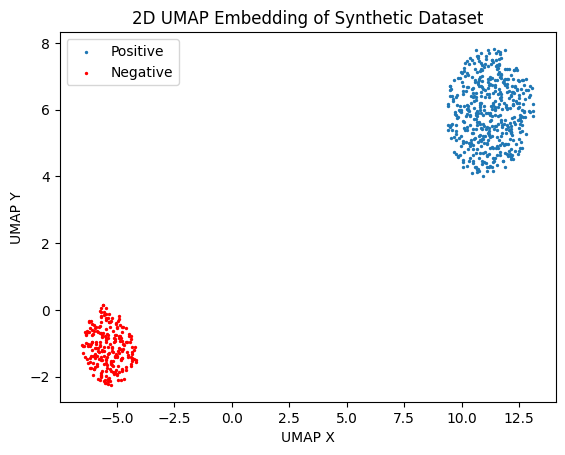

In [11]:
plt.scatter(reduced_synthetic[:472, 0], reduced_synthetic[:472, 1], c="tab:blue", s=2, label="Positive")
plt.scatter(reduced_synthetic[472:, 0], reduced_synthetic[472:, 1], c="red", s=2, label="Negative")
plt.title("2D UMAP Embedding of Ideal Synthetic Dataset")
plt.xlabel("UMAP X")
plt.ylabel("UMAP Y")
plt.legend()
plt.show()

Lastly, we perform classification. Shuffle and split the synthetic data set into test and train sets (with an 80:20 split). Feed the training set and labels into a Random Forest classifier, training it. Then classify the test set and compare the predicted labels to the real test set labels.

In [12]:
rf_clf = RandomForestClassifier()

X_train, X_test, y_train, y_test = train_test_split(synthetic, labels)

rf_clf.fit(X_train, y_train)

y_predict = rf_clf.predict(X_test)

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       113
         1.0       1.00      1.00      1.00        64

    accuracy                           1.00       177
   macro avg       1.00      1.00      1.00       177
weighted avg       1.00      1.00      1.00       177



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


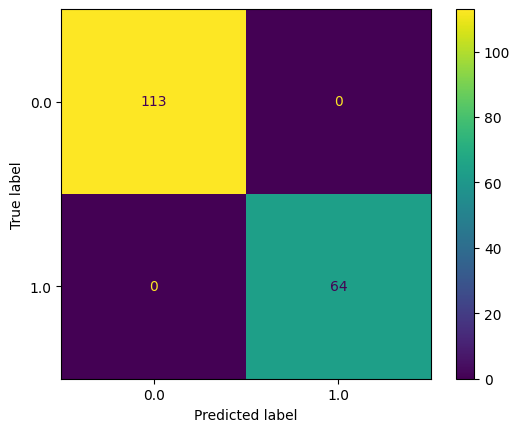

In [13]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

It is also of interest to consider whether providing the classifier model with reduced data would provide better prediction than the full 51-dimensional data set.

In [14]:
rf_clf_reduced = RandomForestClassifier()

X_train_red, X_test_red, y_train, y_test = train_test_split(reduced_synthetic, labels)

rf_clf_reduced.fit(X_train_red, y_train)

y_predict_red = rf_clf_reduced.predict(X_test_red)

print(classification_report(y_test, y_predict_red))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       117
         1.0       1.00      1.00      1.00        60

    accuracy                           1.00       177
   macro avg       1.00      1.00      1.00       177
weighted avg       1.00      1.00      1.00       177



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


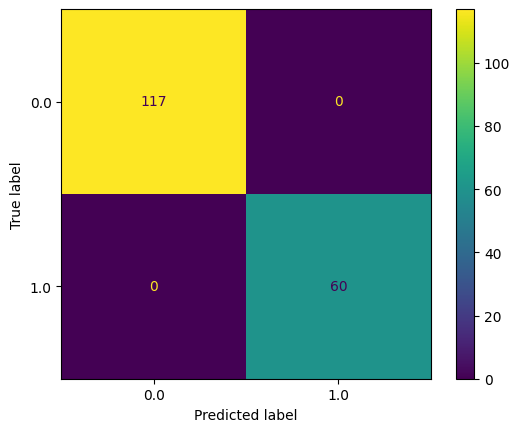

In [15]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_red)

## Test 2: Worst Case

*Note: Above code blocks should be run, as these use objects that were defined above, such as rng and reducer*

Let us show that Random Forest is not prone to excessive overfitting by showing that it produces poor classification in a synthetic data set where the positive and negative classes are poorly-separated.

In [18]:
positive = rng.integers(low=0, high=30, size=(472, 51))
negative = rng.integers(low=0, high=30, size=(235, 51))
sadthetic = np.concatenate((positive, negative), axis=0)
labels = np.concatenate((np.zeros(shape=(472, 1)), np.ones(shape=(235, 1))), axis=0)

sadthetic

array([[15, 17, 10, ..., 14, 22, 20],
       [ 1,  8,  0, ..., 21, 14,  8],
       [12, 24, 29, ..., 26, 13,  2],
       ...,
       [22,  6,  5, ..., 29, 16, 11],
       [22,  8, 28, ...,  3, 24, 23],
       [28,  0, 26, ..., 12, 26, 12]])

As per before, let us now reduce the worst case data set with UMAP and visualise the results. This time, we expect to see a graph with high levels of overlap between the positive and negative classes.

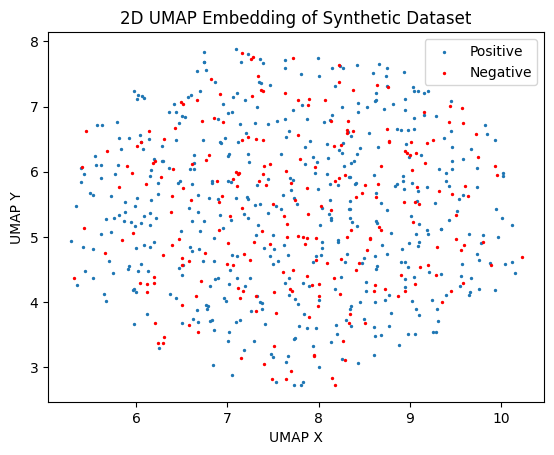

In [20]:
reduced_sadthetic = reducer.fit_transform(sadthetic)

plt.scatter(reduced_sadthetic[:472, 0], reduced_sadthetic[:472, 1], c="tab:blue", s=2, label="Positive")
plt.scatter(reduced_sadthetic[472:, 0], reduced_sadthetic[472:, 1], c="red", s=2, label="Negative")
plt.title("2D UMAP Embedding of Worst-Case Synthetic Dataset")
plt.xlabel("UMAP X")
plt.ylabel("UMAP Y")
plt.legend()
plt.show()

Now, we perform a standard train-test split on the data set and classify both the raw feature and the reduced form with Random Forest.

In [21]:
rf_clf = RandomForestClassifier()

X_train, X_test, y_train, y_test = train_test_split(sadthetic, labels)

rf_clf.fit(X_train, y_train)

y_predict = rf_clf.predict(X_test)

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.64      1.00      0.78       113
         1.0       0.00      0.00      0.00        64

    accuracy                           0.64       177
   macro avg       0.32      0.50      0.39       177
weighted avg       0.41      0.64      0.50       177



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()}

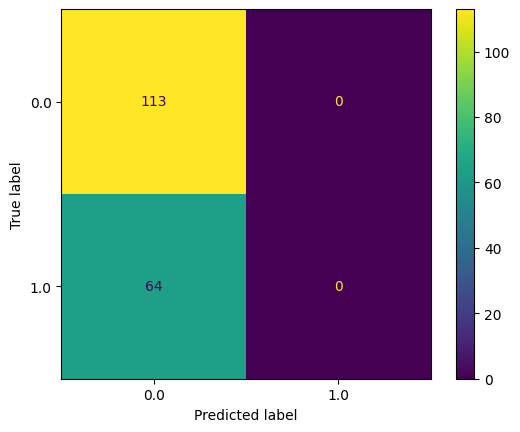

In [23]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

In [24]:
X_train_red, X_test_red, y_train, y_test = train_test_split(reduced_sadthetic, labels)

rf_clf_reduced.fit(X_train_red, y_train)

y_predict_red = rf_clf_reduced.predict(X_test_red)

print(classification_report(y_test, y_predict_red))

              precision    recall  f1-score   support

         0.0       0.69      0.85      0.76       120
         1.0       0.38      0.19      0.26        57

    accuracy                           0.64       177
   macro avg       0.53      0.52      0.51       177
weighted avg       0.59      0.64      0.60       177



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


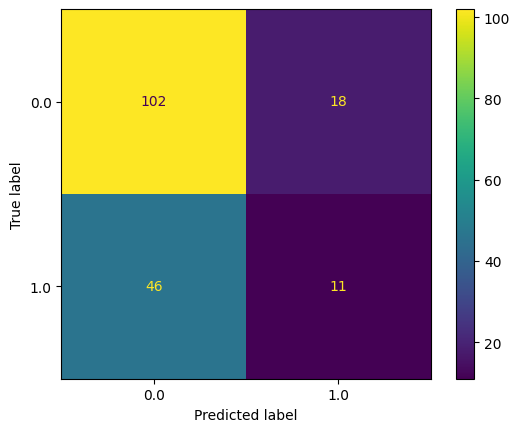

In [25]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_red)

## Test 3: Average Case

Lastly, let us now check if it is better to use the raw data or the reduced data. To do so, we will produce a data set with a medium level of separation and classify it with Random Forest.

In [122]:
positive = rng.integers(low=0, high=30, size=(472, 51))
negative = rng.integers(low=10, high=30, size=(235, 51))
avg = np.concatenate((positive, negative), axis=0)
labels = np.concatenate((np.zeros(shape=(472, 1)), np.ones(shape=(235, 1))), axis=0)

avg

array([[16, 16, 12, ..., 19,  4, 26],
       [ 1, 24, 24, ...,  7, 29,  8],
       [28, 11, 27, ..., 23, 27,  4],
       ...,
       [18, 22, 13, ..., 14, 13, 10],
       [10, 20, 12, ..., 28, 11, 17],
       [23, 22, 26, ..., 10, 29, 10]])

Now, we perform our standard reduction-and-visualisation on this average data set.

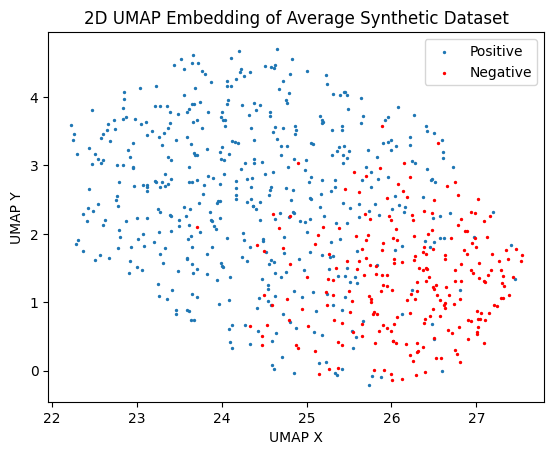

In [123]:
reduced_avg = reducer.fit_transform(avg)

plt.scatter(reduced_avg[:472, 0], reduced_avg[:472, 1], c="tab:blue", s=2, label="Positive")
plt.scatter(reduced_avg[472:, 0], reduced_avg[472:, 1], c="red", s=2, label="Negative")
plt.title("2D UMAP Embedding of Average Synthetic Dataset")
plt.xlabel("UMAP X")
plt.ylabel("UMAP Y")
plt.legend()
plt.show()

Now, we test the Random Forest Classifier on the raw data and the UMAP-reduced data to see which has a higher F1 score.

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       130
         1.0       1.00      1.00      1.00        47

    accuracy                           1.00       177
   macro avg       1.00      1.00      1.00       177
weighted avg       1.00      1.00      1.00       177



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


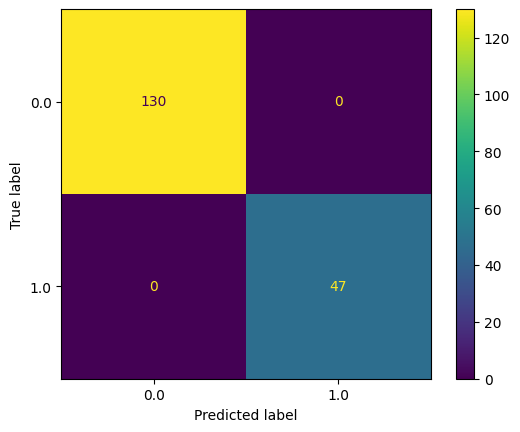

In [124]:
rf_clf = RandomForestClassifier()

X_train, X_test, y_train, y_test = train_test_split(avg, labels)

rf_clf.fit(X_train, y_train)

y_predict = rf_clf.predict(X_test)

print(classification_report(y_test, y_predict))
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87       119
         1.0       0.72      0.76      0.74        58

    accuracy                           0.82       177
   macro avg       0.80      0.81      0.80       177
weighted avg       0.83      0.82      0.83       177



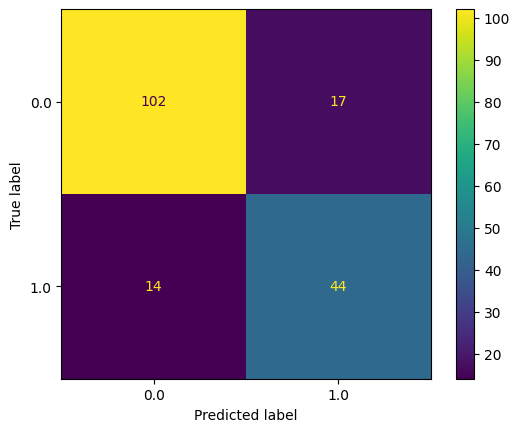

In [125]:
X_train, X_test, y_train, y_test = train_test_split(reduced_avg, labels)

rf_clf.fit(X_train, y_train)

y_predict = rf_clf.predict(X_test)

print(classification_report(y_test, y_predict))
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)